In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df=data.copy()

In [5]:
df=df.iloc[:,3:]

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.duplicated().sum()

0

<Axes: ylabel='Gender'>

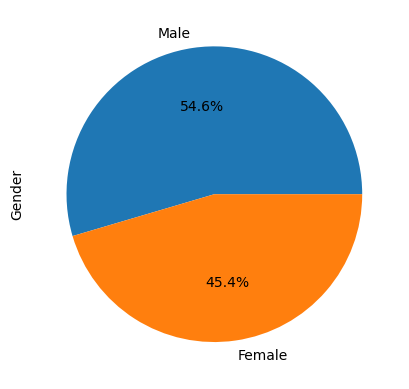

In [12]:
df.Gender.value_counts().plot.pie(autopct="%0.1f%%")

<Axes: xlabel='Age', ylabel='Count'>

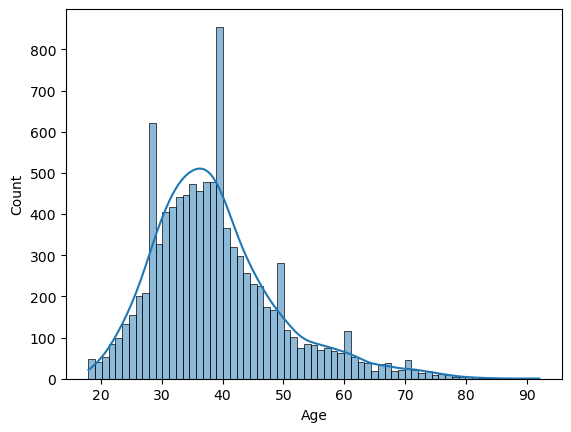

In [13]:
sns.histplot(df["Age"],kde=True)

<Axes: xlabel='Balance', ylabel='Count'>

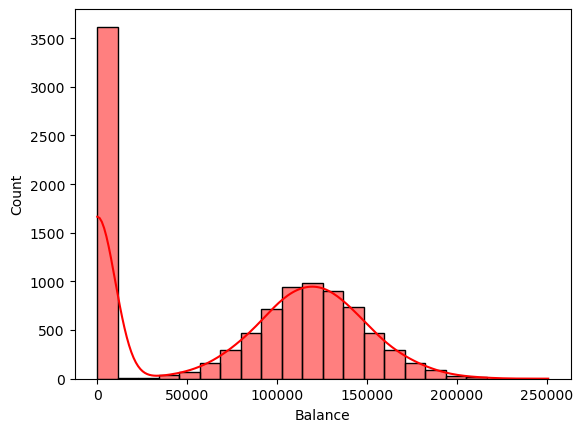

In [14]:
sns.histplot(df["Balance"],kde=True,color="red")

<Axes: ylabel='Tenure'>

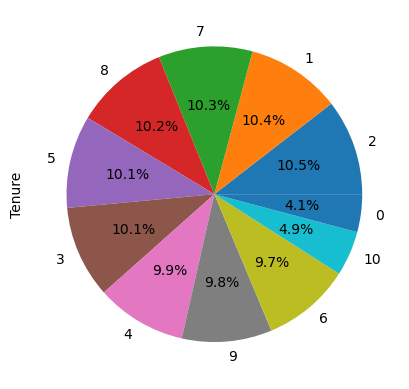

In [15]:
df.Tenure.value_counts().plot.pie(autopct="%0.1f%%")

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

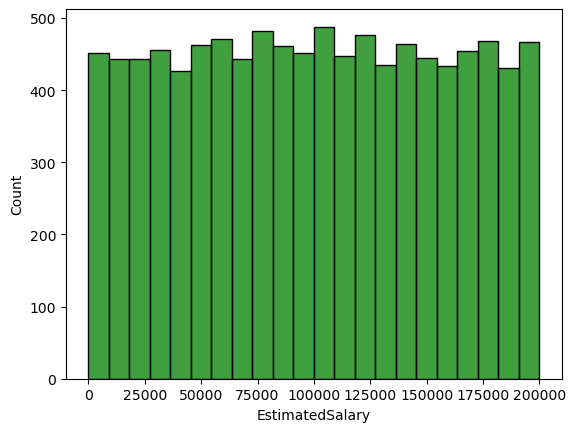

In [16]:
sns.histplot(df["EstimatedSalary"],kde=False,color="green")

In [17]:
temp_col=["NumOfProducts","HasCrCard","IsActiveMember"]
for col in temp_col:
    print(f"{col}: \n\n{df[col].value_counts()}\n")

NumOfProducts: 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

HasCrCard: 

1    7055
0    2945
Name: HasCrCard, dtype: int64

IsActiveMember: 

1    5151
0    4849
Name: IsActiveMember, dtype: int64



In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_object={}
for col in ["Geography","Gender"]:
    label=LabelEncoder()
    label.fit(df[col])
    df[col]=label.transform(df[col])
    label_object[col]=label

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


In [24]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

MinMaxScaler()

In [25]:
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]]=sc.transform(X_train[["CreditScore",
                                                                                "Age","Tenure","Balance","EstimatedSalary"]])

In [26]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,0.672,0,1,0.189189,0.6,0.000000,2,1,1,0.895550
1561,0.564,1,1,0.324324,0.4,0.476786,2,1,1,0.980029
1670,0.418,2,1,0.081081,0.3,0.457317,1,1,0,0.429261
6087,0.422,0,0,0.121622,0.9,0.540606,1,1,0,0.765408
6669,0.334,0,1,0.513514,0.9,0.566554,1,0,0,0.197107


<Axes: >

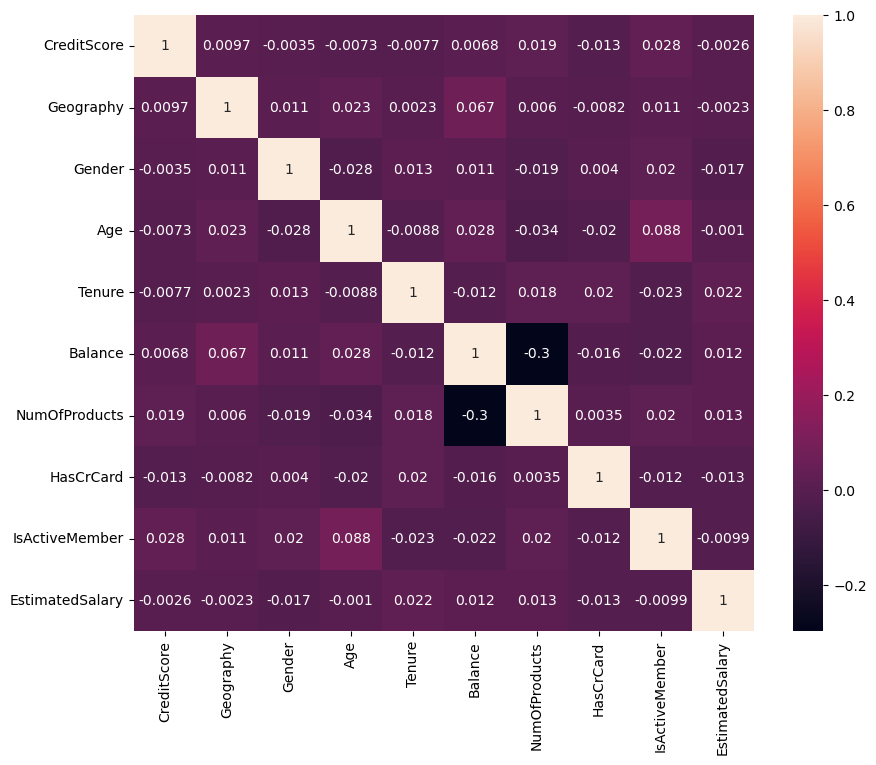

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [31]:
y_pred_train=lr.predict(X_train)
print("The accuracy score on training data is ",accuracy_score(y_pred_train,y_train))
print("The precision score on training data is ",precision_score(y_pred_train,y_train))
print("The recall score on training data is ",recall_score(y_pred_train,y_train))
print("The confusion matrix of the training data is \n",confusion_matrix(y_pred_train,y_train))

The accuracy score on training data is  0.8085
The precision score on training data is  0.17092457420924576
The recall score on training data is  0.6244444444444445
The confusion matrix of the training data is 
 [[6187 1363]
 [ 169  281]]


<Axes: >

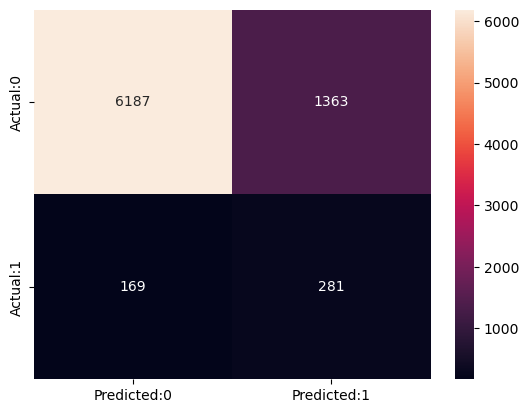

In [32]:
cm=confusion_matrix(y_pred_train,y_train)
cm_data=pd.DataFrame(cm,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
sns.heatmap(cm_data,annot=True,fmt='d')

In [33]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float((TP+FN))
specificity=TN/float((TN+FP))

In [35]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Missclassifications = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity/Recall or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Precision/Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8085 
 Missclassifications = 1-Accuracy =  0.1915 
 Sensitivity/Recall or True Positive Rate = TP/(TP+FN) =  0.6244444444444445 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8194701986754966 
 Precision/Positive Predictive value = TP/(TP+FP) =  0.17092457420924576 
 Negative predictive Value = TN/(TN+FN) =  0.973410950283197 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.458954919703268 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.4582906811773791


# Prediction on test data

In [37]:
sc_test=MinMaxScaler()
sc_test.fit(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

MinMaxScaler()

In [38]:
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]]=sc.transform(X_test[["CreditScore",
                                                                                        "Age","Tenure","Balance","EstimatedSalary"]])

In [39]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,0.492,1,1,0.189189,0.3,0.385452,2,0,0,0.208616
4684,0.546,0,1,0.337838,0.1,0.000000,2,1,1,0.731883
1731,0.502,2,0,0.351351,0.4,0.000000,2,1,0,0.292531
4742,0.312,1,1,0.554054,0.8,0.474902,2,1,1,0.853458
4521,0.420,2,0,0.121622,0.7,0.498194,1,1,1,0.573241


In [40]:
y_pred_test=lr.predict(X_test)
print("The accuracy score on test data is ",accuracy_score(y_pred_test,y_test))
print("The precision score on test data is ",precision_score(y_pred_test,y_test))
print("The recall score on test data is ",recall_score(y_pred_test,y_test))
print("The confusion matrix of the test data is \n",confusion_matrix(y_pred_test,y_test))

The accuracy score on test data is  0.816
The precision score on test data is  0.17048346055979643
The recall score on test data is  0.6146788990825688
The confusion matrix of the test data is 
 [[1565  326]
 [  42   67]]


In [41]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [42]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [44]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [45]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.807417 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.806958 (0.007897) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.806917 (0.007924) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.806917 (0.007924) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.806958 (0.007897) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.806917 (0.007891) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.806833 (0.007526) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.806833 (0.007526) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.806875 (0.007540) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 